In [4]:
import pandas as pd

df = pd.read_csv("SaveData/train_seoul_2.csv")

In [5]:
train_x, train_y = df.drop('log_price', axis=1), df.log_price

In [6]:
train_x

,year_of_completion,transaction_year_month,floor,top10,apt_label,log_area,year,month,gu_label,park_number,income
0,2002,200801,2,0,0,4.452252,2008,1,22,5.0,17.772122
1,1973,200801,6,0,0,4.606869,2008,1,22,5.0,17.772122
2,2007,200801,6,0,0,4.451319,2008,1,22,5.0,17.772122
3,2003,200801,15,0,0,4.993082,2008,1,22,5.0,17.772122
4,2004,200801,3,0,0,5.275202,2008,1,22,5.0,17.772122
...,...,...,...,...,...,...,...,...,...,...,...
742280,2011,201711,9,0,0,4.106273,2017,11,1,23.0,16.483032
742281,2009,201711,12,0,0,4.108740,2017,11,1,23.0,16.483032
742282,2009,201711,3,0,0,4.451319,2017,11,1,23.0,16.483032
742283,2009,201711,9,0,0,4.451319,2017,11,1,23.0,16.483032


In [7]:
train_y

0         10.532123
1          9.903538
2         10.558439
3         11.678448
4         11.695255
            ...    
742280    10.878066
742281    10.878066
742282    10.942014
742283    10.924156
742284    11.062740
Name: log_price, Length: 742285, dtype: float64

In [5]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742285 entries, 0 to 742284
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   year_of_completion      742285 non-null  int64  
 1   transaction_year_month  742285 non-null  int64  
 2   floor                   742285 non-null  int64  
 3   top10                   742285 non-null  int64  
 4   apt_label               742285 non-null  int64  
 5   log_area                742285 non-null  float64
 6   year                    742285 non-null  int64  
 7   month                   742285 non-null  int64  
 8   gu_label                742285 non-null  int64  
 9   park_number             742285 non-null  float64
 10  income                  742285 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 62.3 MB


In [6]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
import xgboost as xgb
import lightgbm as lgb

/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [7]:
reg = LinearRegression(n_jobs=-1)
ridge = Ridge(alpha=0.8, random_state=1)
lasso = Lasso(alpha = 0.01, random_state=1)
Enet = ElasticNet(alpha=0.03, l1_ratio=0.01, random_state=1)
DTree = DecisionTreeRegressor(max_depth=6, min_samples_split=10, min_samples_leaf=15, random_state=1)
rf = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=9, min_samples_split=50,min_samples_leaf=5, random_state=1,n_jobs=-1)
model_xgb = xgb.XGBRegressor(n_estimators=500, max_depth=9, min_child_weight=5, gamma=0.1, n_jobs=-1)
model_lgb = lgb.LGBMRegressor(n_estimators=500, max_depth=9, min_child_weight=5, n_jobs=-1)

In [8]:
modelList = []
def myModel(model):
    scores = cross_val_score(model, train_x, train_y, scoring="neg_mean_squared_error", cv=10)
    rmse_score = np.sqrt(-1 * scores)
    modelName =  model.__class__.__name__
    return {modelName : rmse_score}

In [9]:
modelList.append(myModel(reg))
modelList.append(myModel(ridge))
modelList.append(myModel(Enet))
modelList.append(myModel(DTree))
modelList.append(myModel(rf))
modelList.append(myModel(model_xgb))
modelList.append(myModel(model_lgb))

/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

In [9]:
df = pd.DataFrame()

In [ ]:
for resultList in modelList:
    for k, v in resultList.items():
        df[k]= v;

In [16]:
df.to_csv("results.csv", index=False);

In [17]:
df = pd.read_csv("results.csv")

In [20]:
col = list(df.columns)

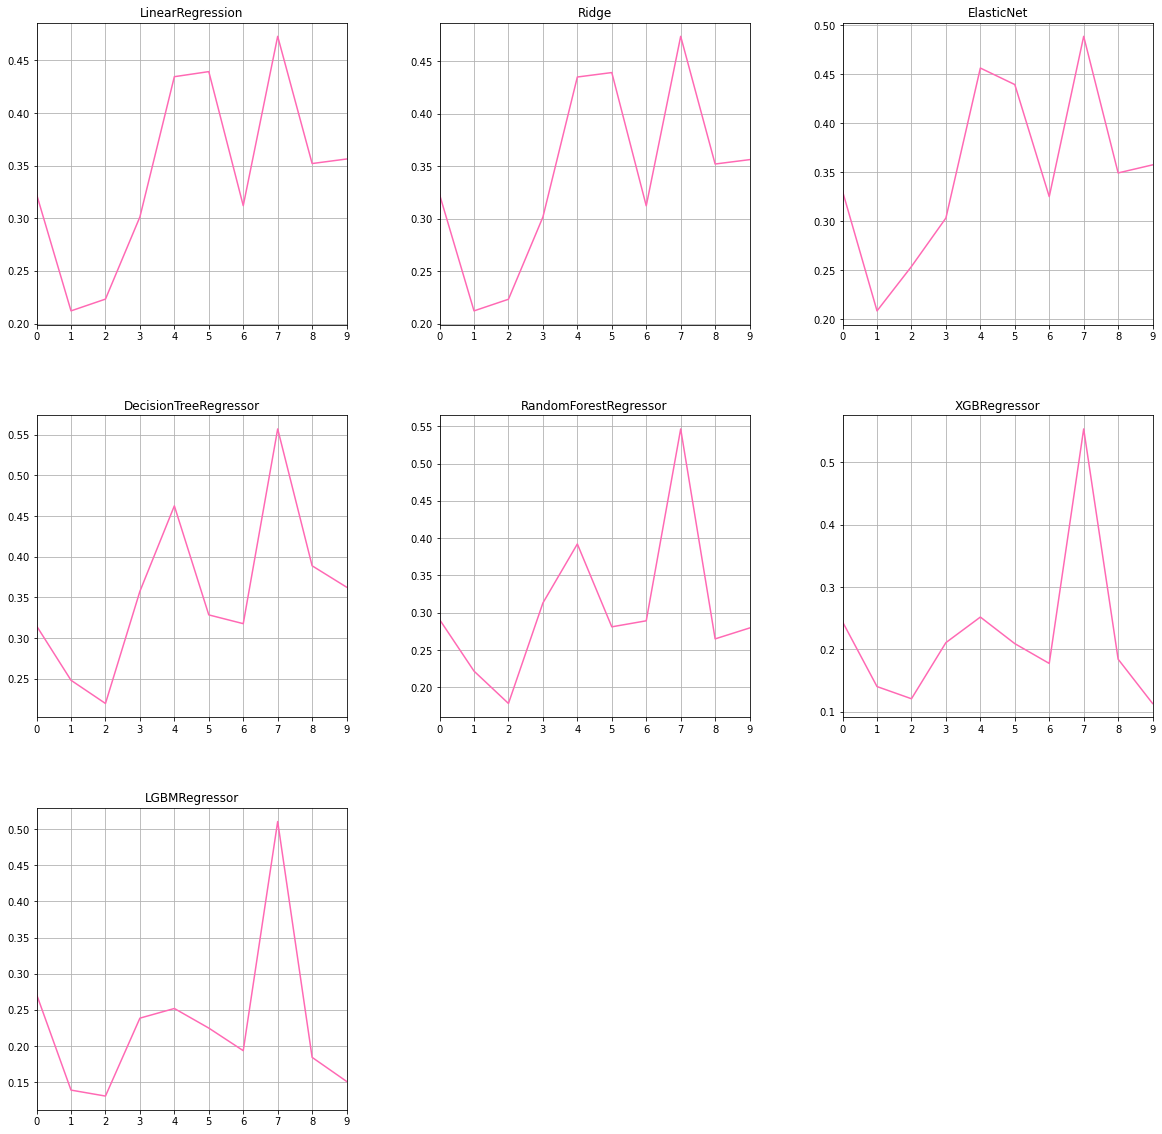

In [63]:
import matplotlib.pyplot as plt;

plt.figure(figsize=(20,20));

plt.subplots_adjust(wspace=0.3, hspace=0.3)
for i in range(len(col)):
    plt.subplot(3,3,i+1)
    plt.title(col[i])
    plt.xlim(0, 9)
    plt.plot(df.loc[:, col[i]], color="hotpink")
    plt.grid(True)

plt.show()

In [66]:
df.mean()

LinearRegression         0.342667
Ridge                    0.342730
ElasticNet               0.351184
DecisionTreeRegressor    0.355633
RandomForestRegressor    0.305611
XGBRegressor             0.220760
LGBMRegressor            0.229565
dtype: float64

In [74]:
df_mean = df.mean().reset_index().rename(columns = {
    "index" : "model",
    0 : 'score'
})

In [75]:
df_mean

,model,score
0,LinearRegression,0.342667
1,Ridge,0.342730
2,ElasticNet,0.351184
3,DecisionTreeRegressor,0.355633
4,RandomForestRegressor,0.305611
5,XGBRegressor,0.220760
6,LGBMRegressor,0.229565


In [77]:
import seaborn as sns

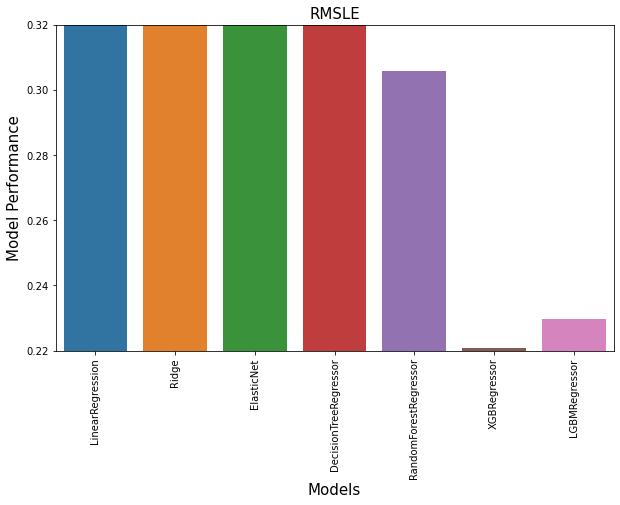

In [79]:
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=df_mean['model'], y=df_mean['score'])
plt.xlabel('Models', fontsize=15)
plt.ylabel('Model Performance', fontsize=15)
plt.ylim(0.22, 0.32)
plt.title('RMSLE', fontsize=15)
plt.show()

In [2]:
xgb_param_grid={
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [3,5,7,10,15],
    'gamma' : [0,1,2,3],
    'colsample_bytree' : [0.8,0.9],

}

xgb_param_grid

{'n_estimators': [100, 200, 300, 400, 500],
 'learning_rate': [0.01, 0.05, 0.1, 0.15],
 'max_depth': [3, 5, 7, 10, 15],
 'gamma': [0, 1, 2, 3],
 'colsample_bytree': [0.8, 0.9]}

In [8]:
# model tuning

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time

# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
    'min_child_weight':[4,5],
    'gamma':[i/10.0 for i in range(3,6)],
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)],
    'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

reg = XGBRegressor(nthread=-1)

# run randomized search
n_iter_search = 100
random_search = RandomizedSearchCV(reg, param_distributions=xgb_param_grid,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

start = time.time()
random_search.fit(train_x, train_y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))

/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/kim-seung-gyeom/opt/anaconda3/envs/ml/lib/python3.9/site-

KeyboardInterrupt: 